In [2]:
#Import for chapter word count
import pandas as pd

# Imports for clean_text()
import string
import nltk
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
stopwords = set(en_stopwords)
from nltk.stem import WordNetLemmatizer 

# Imports for the word cloud
import wordcloud as wc
import numpy as np
from os import path
from PIL import Image
import matplotlib.pyplot as plt
% matplotlib inline

# Imports for ngram similarity
import spacy
import spacy
# The large form (encouraged) of set of English tokenizer,
# tagger, parser, and word vectors.
nlp = spacy.load("en_core_web_lg")

In [79]:
cage = pd.read_csv('nic-cage.csv')
cage = pd.DataFrame(cage)
#cage

,movie,character,voice,year
0,Spider-Man: Into the Spider-Verse,Spider-Man Noir,1,2018
1,Between Worlds,Joe,0,2018
2,Teen Titans Go! To the Movies,Superman,1,2018
3,211,Mike Chandler,0,2018
4,Looking Glass,Ray,0,2018
5,Mandy,Red Miller,0,2018
6,The Humanity Bureau,Noah Kross,0,2017
7,Mom and Dad,Brent,0,2017
8,Inconceivable,Brian,0,2017
9,Vengeance: A Love Story,John,0,2017


In [96]:
cage.movie[0]
cages = [cage.movie[i] for i in range(90)]
#cages

In [106]:
cage.character[0]
cage_chars = [cage.character[i] for i in range(90)]

In [97]:
from collections import Counter

cage_str = ' '.join(cages)
indiv_words = cage_str.split(' ')
count_obj = Counter(indiv_words)
for c in count_obj.keys():
    if count_obj[c] > 1 and c.lower() not in en_stopwords:
        print(c, count_obj[c])

Men 2
Dog 2
Ghost 3
Boy 2
National 2
Man 3
Rock 2
Vegas 2
Kiss 2
Times 2


In [101]:
indivs = [i for i in indiv_words if i not in en_stopwords]

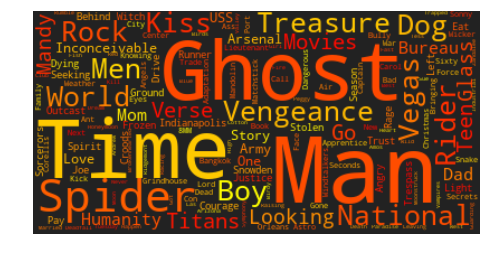

In [104]:
cage_wc = wc.WordCloud(background_color='#222222',
                       max_words=5000,
                       contour_width=0.5,
                       contour_color='#666666',
                       colormap='autumn',
                       collocations=False)

cage_wc.generate(str(indivs).replace("', '"," ").replace("'",""))
plt.figure(figsize=(8,10))
plt.imshow(cage_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [114]:
cage_char_str = ' '.join(cage_chars)
indiv_words_two = cage_char_str.split(' ')
indivs_chars = [i for i in indiv_words_two]
count_obj_two = Counter(indiv_words_two)
for c in count_obj_two.keys():
    if count_obj_two[c] > 1 and c.lower() not in en_stopwords:
        print(c, count_obj_two[c])

Joe 4
Mike 2
Red 2
Miller 2
John 3
Eddie 2
Captain 2
Troy 2
Jack 3
Johnny 3
Blaze 2
Ghost 2
Rider 2
Benjamin 2
Franklin 2
Gates 2
Charlie 3
Kaufman 2


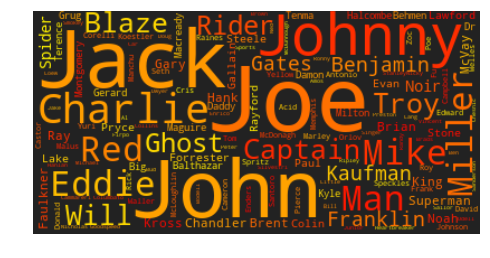

In [111]:
cage_wc.generate(str(indivs_chars).replace("', '"," ").replace("'",""))
plt.figure(figsize=(8,10))
plt.imshow(cage_wc, interpolation='bilinear')
plt.axis("off")
plt.show()